In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
import sklearn.metrics as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import chi2
from sklearn.inspection import permutation_importance

In [ ]:
#importing datasets  
data_set= pd.read_csv('/content/drive/MyDrive/ML Dataset/FlatRentDataset.csv') 

In [ ]:
data_set = data_set.fillna(0)

In [ ]:
X = data_set.drop(['Rent'], axis=1)

y = data_set['Rent']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 30)

In [ ]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import category_encoders as ce

In [ ]:
# Transform string value to int value

encoder = ce.OrdinalEncoder(cols= ['Area', 'NearbyBazar', 'FloorType','GarrageFacilities', 'LiftService', 'GasAvailability',
'SecurityService', 'CCTVCoverage'])

x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

In [ ]:
x_train.shape

(1095, 14)

In [ ]:
#Linear regression model
def funLinearRegression(XTrain,YTrain):
  lr = LinearRegression()
  lr.fit(XTrain,YTrain)
  pre = lr.predict(x_test)
  print("Explain variance score =", round(sm.explained_variance_score(y_test, pre), 4)) 
  print("R2 score =", round(sm.r2_score(y_test, pre), 4))

In [ ]:
#Lasso
def funLassoRegression(X,Y):
  lass = linear_model.Lasso(alpha=0.1)
  lass.fit(x_train,y_train)
  las_y_pred = lass.predict(x_test)
  print("Explain variance score =", round(sm.explained_variance_score(y_test, las_y_pred), 4)) 
  print("R2 score =", round(sm.r2_score(y_test, las_y_pred), 4))

In [ ]:
#Decision Tress
def funDecisionTree(X,Y):
  dt = DecisionTreeRegressor(max_depth=5)
  dt.fit(X,Y)
  dt_y_pre = dt.predict(x_test)
  print("Explain variance score =", round(sm.explained_variance_score(y_test, dt_y_pre), 4)) 
  print("R2 score =", round(sm.r2_score(y_test, dt_y_pre), 4))

In [ ]:
#Random Forest
def funRandomForest(X,Y):
  rf = RandomForestRegressor(n_estimators = 30, random_state = 0)
  rf.fit(X, Y)
  #print(X.shape)
  y_pred = rf.predict(x_test)
  print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 4)) 
  print("R2 score =", round(sm.r2_score(y_test, y_pred), 4))

In [ ]:
#Logistic
def funLogisticRegression(X,Y):
  log = LogisticRegression()
  log.fit(x_train,y_train)
  lr_y_pred = log.predict(x_test)
  print("Explain variance score =", round(sm.explained_variance_score(y_test, lr_y_pred), 4)) 
  print("R2 score =", round(sm.r2_score(y_test, lr_y_pred), 4))

In [ ]:
#Gaussian
def funGaussianNB(X,Y):
  gnb = GaussianNB()
  gnb.fit(x_train,y_train)
  gaus_y_pred = gnb.predict(x_test)
  print("Explain variance score =", round(sm.explained_variance_score(y_test, gaus_y_pred), 4)) 
  print("R2 score =", round(sm.r2_score(y_test, gaus_y_pred), 4))

In [ ]:
x_train.head()

,Area,FlatSize,NearbyBazar,FloorNumber,TotalBedrooms,AttachedWashrooms,TotalBalconies,FloorType,GarrageFacilities,LiftService,GasAvailability,SecurityService,CCTVCoverage,WalkingDistanceFromMainRoad
1233,1,1100,1,3,2,1,2,1,1,1,1,1,1,1
756,2,1580,1,15,3,2,2,1,1,2,1,1,2,3
1423,3,1350,1,12,3,2,2,2,1,2,2,2,2,15
275,4,1700,2,5,3,2,2,1,1,1,2,1,2,27
1305,5,1450,1,2,3,2,3,1,2,1,1,2,1,29


In [ ]:
funLinearRegression(x_train,y_train)

Explain variance score = 0.9662
R2 score = 0.9658


In [ ]:
funLassoRegression(x_train,y_train)

Explain variance score = 0.9662
R2 score = 0.9658


In [ ]:
funDecisionTree(x_train,y_train)

Explain variance score = 0.9421
R2 score = 0.942


In [ ]:
funRandomForest(x_train,y_train)

Explain variance score = 0.9836
R2 score = 0.9836


In [ ]:
funLogisticRegression(x_train,y_train)

Explain variance score = 0.1409
R2 score = 0.0778


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
funGaussianNB(x_train,y_train)

Explain variance score = 0.946
R2 score = 0.946


In [ ]:
score = chi2(x_train,y_train)
pScore = pd.Series(score[1])
pScore.index = x_train.columns

In [ ]:
print(pScore.sort_values(ascending=False))

LiftService                    1.000000e+00
GasAvailability                1.000000e+00
GarrageFacilities              1.000000e+00
NearbyBazar                    9.999998e-01
SecurityService                9.999996e-01
FloorType                      9.999978e-01
CCTVCoverage                   9.999956e-01
TotalBalconies                 2.666951e-01
TotalBedrooms                  1.154600e-03
FloorNumber                    2.972720e-04
AttachedWashrooms              3.506038e-10
Area                           1.459968e-17
WalkingDistanceFromMainRoad    2.235789e-31
FlatSize                       0.000000e+00
dtype: float64


In [ ]:
rf = RandomForestRegressor(n_estimators = 30, random_state = 0)
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=30, random_state=0)

In [ ]:
rf.feature_importances_

array([3.71401808e-02, 8.99410173e-01, 1.25521342e-03, 8.05951090e-03,
       3.44888168e-02, 6.76269829e-04, 2.26603397e-05, 6.47587106e-04,
       1.27736784e-03, 5.22900845e-03, 2.61166504e-03, 1.28161199e-03,
       1.64124257e-03, 6.25869200e-03])

Text(0.5, 0, 'Random Forest Feature Importance')

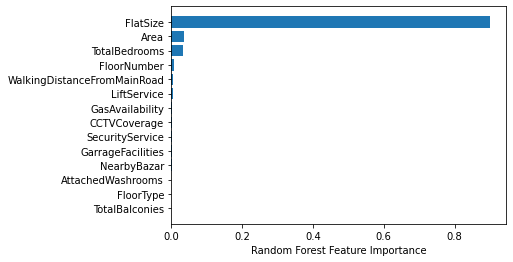

In [ ]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(x_train.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
x_train.head()

,Area,FlatSize,NearbyBazar,FloorNumber,TotalBedrooms,AttachedWashrooms,TotalBalconies,FloorType,GarrageFacilities,LiftService,GasAvailability,SecurityService,CCTVCoverage,WalkingDistanceFromMainRoad
1233,1,1100,1,3,2,1,2,1,1,1,1,1,1,1
756,2,1580,1,15,3,2,2,1,1,2,1,1,2,3
1423,3,1350,1,12,3,2,2,2,1,2,2,2,2,15
275,4,1700,2,5,3,2,2,1,1,1,2,1,2,27
1305,5,1450,1,2,3,2,3,1,2,1,1,2,1,29


In [ ]:
cross_score = cross_val_score(rf,x_train,y_train,cv=5)

In [ ]:
cross_score

array([0.93559065, 0.97023165, 0.74818288, 0.97492958, 0.89001264])

In [ ]:
print(cross_score.mean())

0.9037894811861682


In [ ]:
funRandomForest(x_train,y_train)

Explain variance score = 0.9836
R2 score = 0.9836


In [ ]:
x_train.head()

,Area,FlatSize,NearbyBazar,FloorNumber,TotalBedrooms,AttachedWashrooms,TotalBalconies,FloorType,GarrageFacilities,LiftService,GasAvailability,SecurityService,CCTVCoverage,WalkingDistanceFromMainRoad
1233,1,1100,1,3,2,1,2,1,1,1,1,1,1,1
756,2,1580,1,15,3,2,2,1,1,2,1,1,2,3
1423,3,1350,1,12,3,2,2,2,1,2,2,2,2,15
275,4,1700,2,5,3,2,2,1,1,1,2,1,2,27
1305,5,1450,1,2,3,2,3,1,2,1,1,2,1,29


In [ ]:
del x_train['TotalBalconies']
del x_train['FloorType']
del x_train['AttachedWashrooms']
del x_train['NearbyBazar']
del x_train['GarrageFacilities']
del x_train['SecurityService']
del x_train['CCTVCoverage']
#del x_train['GasAvailability']
#del x_train['LiftService']

In [ ]:
del x_test['TotalBalconies']
del x_test['FloorType']
del x_test['AttachedWashrooms']
del x_test['NearbyBazar']
del x_test['GarrageFacilities']
del x_test['SecurityService']
del x_test['CCTVCoverage']
#del x_test['GasAvailability']
#del x_test['LiftService']

In [ ]:
lr = LinearRegression()

In [ ]:
cross_score = cross_val_score(lr,x_train,y_train,cv=5)
cross_score

array([0.904046  , 0.92142084, 0.81480053, 0.89810824, 0.94802236])

In [ ]:
cross_score.mean()

0.8972795930437151

In [ ]:
lass = linear_model.Lasso(alpha=0.1)

In [ ]:
cross_score = cross_val_score(lass,x_train,y_train,cv=5)
cross_score

array([0.90404203, 0.92142122, 0.81480408, 0.89810904, 0.94802812])

In [ ]:
cross_score.mean()

0.8972808975923989

In [ ]:
funLassoRegression(x_train,x_test)

Explain variance score = 0.9666
R2 score = 0.9663


In [ ]:
funDecisionTree(x_train,y_train)

Explain variance score = 0.9421
R2 score = 0.942


In [ ]:
dt = DecisionTreeRegressor(max_depth=6)

In [ ]:
cross_score = cross_val_score(dt,x_train,y_train,cv=5)

In [ ]:
cross_score

array([0.74116616, 0.96166679, 0.61022017, 0.96449085, 0.94486596])

In [ ]:
cross_score.mean()

0.8444819876528914

In [ ]:
funRandomForest(x_train,y_train)

Explain variance score = 0.9863
R2 score = 0.9863


In [ ]:
ef = RandomForestRegressor(n_estimators = 30, random_state = 0)

In [ ]:
cross_score = cross_val_score(rf,x_train,y_train,cv=5)

In [ ]:
cross_score

array([0.9352933 , 0.97609127, 0.75678613, 0.97508937, 0.90737549])

In [ ]:
cross_score.mean()

0.9101271116106749

In [ ]:
funLogisticRegression(x_train,y_train)

Explain variance score = 0.1288
R2 score = 0.0515


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
log = LogisticRegression()

In [ ]:
cross_score = cross_val_score(log,x_train,y_train,cv=5)
cross_score

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org

array([0.12785388, 0.14155251, 0.15525114, 0.15068493, 0.14611872])

In [ ]:
cross_score.mean()

0.14429223744292236

In [ ]:
funGaussianNB(x_train,y_train)

Explain variance score = 0.9416
R2 score = 0.9416


In [ ]:
gnb = GaussianNB()

In [ ]:
cross_score = cross_val_score(gnb,x_train,y_train,cv=5)
cross_score

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


array([0.94063927, 0.9086758 , 0.95890411, 0.95890411, 0.92694064])

In [ ]:
cross_score.mean()

0.9388127853881277